## Data Dictionary 

In [1]:
# Please import kid.csv

Here are the variables that magazine reseller has on each customer from third-party sources:
Household Income (Income; rounded to the nearest $1,000.00)

Gender (IsFemale = 1 if the person is female, 0 otherwise)

Marital Status (IsMarried = 1 if married, 0 otherwise)

College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

Retired (IsRetired = 1 if retired, 0 otherwise)

Not employed (Unemployed = 1 if not employed, 0 otherwise)

Length of Residency in Current City (ResLength; in years)

Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

Home ownership (Own = 1 if own residence, 0 otherwise)

Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

Race (White = 1 if the race is white, 0 otherwise)

Language (English = 1 is the primary language in the household is English, 0 otherwise)

With this dataset, we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. At last, we’ll evaluate our model using the confusion matrix.

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Kid.csv')

In [3]:
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [4]:
df.shape

(673, 18)

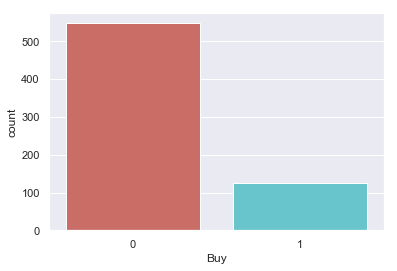

In [5]:
sns.countplot(x='Buy',data=df, palette='hls')

In [6]:
df.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

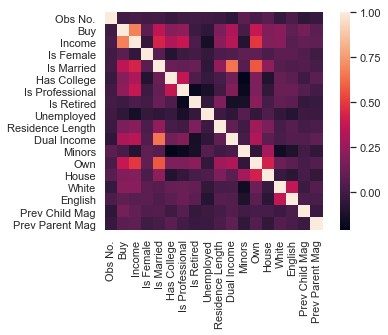

In [10]:
sns.heatmap(df.corr(), square = True) 

In [14]:
X = df[['Income', 'Is Married']]
y = df['Buy']
print(X.head())

   Income  Is Married
0   24000           0
1   75000           1
2   46000           1
3   70000           1
4   43000           0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [16]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

//anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred = LogReg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[157,   9],
       [  9,  27]])

In [19]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9108910891089109
